# GPT


In [ ]:
%pip install datasets matplotlib seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("go_emotions", "simplified")
train_df = dataset["train"].to_pandas()
validation_df = dataset["validation"].to_pandas()
test_df = dataset["test"].to_pandas()

# Concatenate all dataframes into a single dataframe
all_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)

display(all_df.head())

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


In [ ]:
# Calculate the value counts of the 'labels' column
label_counts = all_df['labels'].explode().value_counts()

display(label_counts)

labels
27    17772
0      5122
4      3687
15     3372
3      3093
1      2895
7      2723
10     2581
18     2576
20     1976
2      1960
17     1785
6      1673
25     1625
9      1583
22     1382
5      1375
26     1330
13     1052
11     1013
8       801
14      764
24      669
12      375
19      208
23      182
21      142
16       96
Name: count, dtype: int64

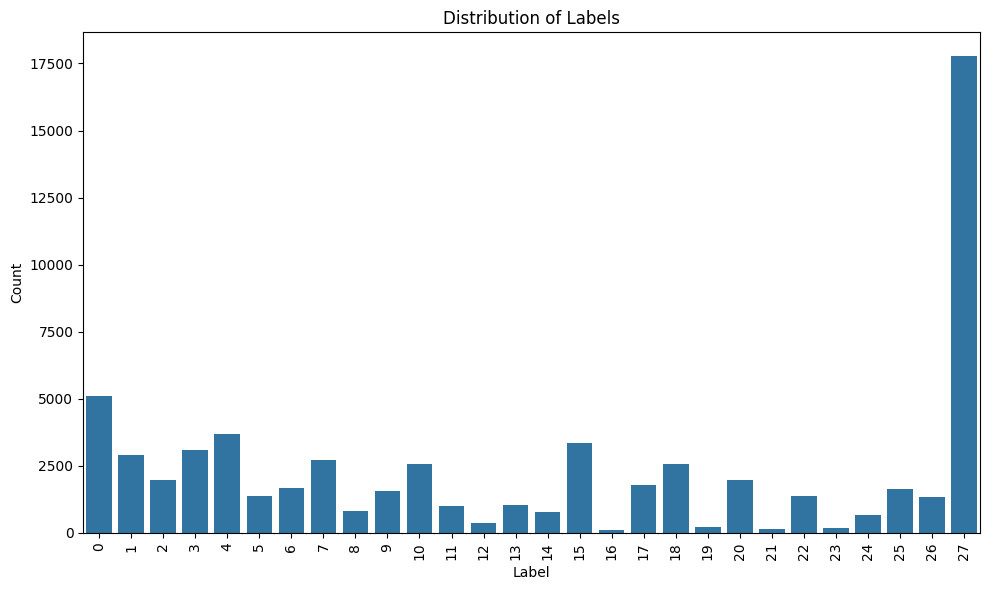

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution of Labels")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Create a dictionary to map label IDs to emotion names
emotion_map = {
    0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval",
    5: "caring", 6: "confusion", 7: "curiosity", 8: "desire", 9: "disappointment",
    10: "disapproval", 11: "disgust", 12: "embarrassment", 13: "excitement",
    14: "fear", 15: "gratitude", 16: "grief", 17: "joy", 18: "love",
    19: "nervousness", 20: "optimism", 21: "pride", 22: "realization", 23: "relief",
    24: "remorse", 25: "sadness", 26: "surprise", 27: "neutral"
}

# Map the labels in the dataframe to emotion names
all_df['emotion_labels'] = all_df['labels'].apply(lambda x: [emotion_map[i] for i in x])

# Map the labels in the label_counts series to emotion names
label_counts.index = label_counts.index.map(emotion_map)

display(all_df.head())
display(label_counts.head())

,text,labels,id,emotion_labels
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]


labels
neutral       17772
admiration     5122
approval       3687
gratitude      3372
annoyance      3093
Name: count, dtype: int64

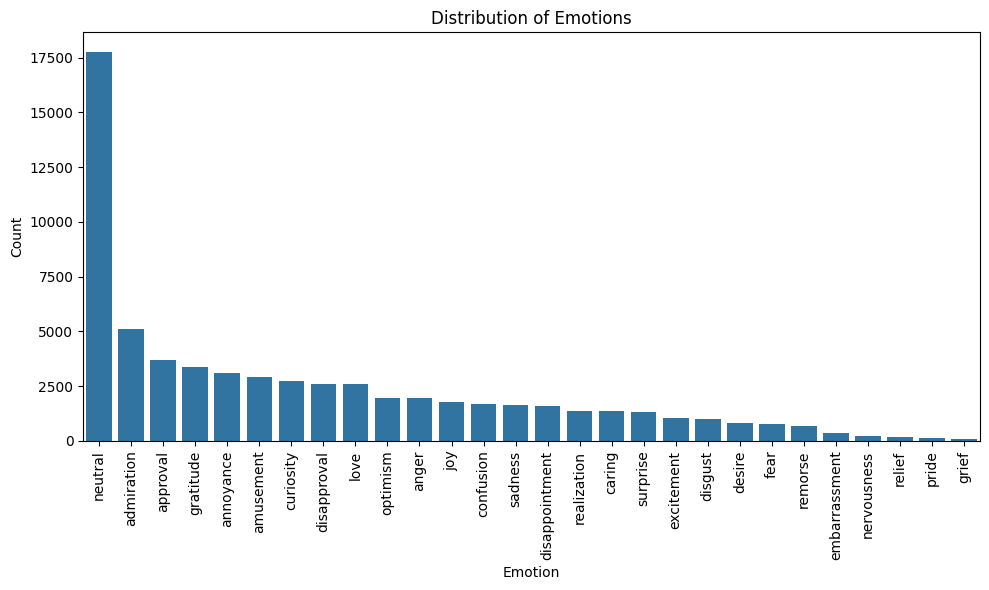

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Distribution of Emotions")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# Filter the dataframe to remove 'neutral' and 'admiration' emotions
filtered_df = all_df[~all_df['emotion_labels'].apply(lambda x: 'neutral' in x or 'admiration' in x)]

display(filtered_df.head())

,text,labels,id,emotion_labels
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26,[surprise]
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu,[gratitude]


In [ ]:
import re

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [ ]:
filtered_df['cleaned_text'] = filtered_df['text'].apply(clean_text)
display(filtered_df.head())

C:\Users\adria\AppData\Local\Temp\ipykernel_33720\2332260876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['cleaned_text'] = filtered_df['text'].apply(clean_text)


,text,labels,id,emotion_labels,cleaned_text
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger],why the fuck is bayless isoing
3,To make her feel threatened,[14],ed7ypvh,[fear],to make her feel threatened
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance],dirty southern wankers
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26,[surprise],omg peyton isnt good enough to help us in the ...
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu,[gratitude],yes i heard abt the f bombs that has to be why...


In [ ]:
%pip install transformers -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    filtered_df['cleaned_text'],
    filtered_df['emotion_labels'],
    test_size=0.2,
    random_state=42
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (25188,)
Shape of X_test: (6298,)
Shape of y_train: (25188,)
Shape of y_test: (6298,)


In [ ]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

In [ ]:
# Tokenize the training and testing data
X_train_tokenized = X_train.apply(lambda x: tokenizer.encode(x, truncation=True))
X_test_tokenized = X_test.apply(lambda x: tokenizer.encode(x, truncation=True))

print(f"Number of tokenized training samples: {len(X_train_tokenized)}")
print(f"Number of tokenized testing samples: {len(X_test_tokenized)}")

Number of tokenized training samples: 25188
Number of tokenized testing samples: 6298


In [ ]:
import torch

# Set the pad token for the tokenizer
tokenizer.pad_token = tokenizer.eos_token

# Pad the tokenized sequences
def pad_sequences(sequences, max_length, padding_value):
    padded_sequences = []
    for seq in sequences:
        if len(seq) > max_length:
            padded_sequences.append(seq[:max_length])
        else:
            padded_sequences.append(seq + [padding_value] * (max_length - len(seq)))
    return padded_sequences

# Find the maximum length of the tokenized sequences
# max_length = max(len(seq) for seq in X_train_tokenized) # Original dynamic max_length
max_length = 128 # Set max_length to 128 as requested

X_train_padded = torch.tensor(pad_sequences(X_train_tokenized, max_length, tokenizer.pad_token_id))
X_test_padded = torch.tensor(pad_sequences(X_test_tokenized, max_length, tokenizer.pad_token_id))

# Create attention masks
X_train_attention_mask = (X_train_padded != tokenizer.pad_token_id).long()
X_test_attention_mask = (X_test_padded != tokenizer.pad_token_id).long()

print(f"Shape of X_train_padded: {X_train_padded.shape}")
print(f"Shape of X_test_padded: {X_test_padded.shape}")
print(f"Shape of X_train_attention_mask: {X_train_attention_mask.shape}")
print(f"Shape of X_test_attention_mask: {X_test_attention_mask.shape}")

Shape of X_train_padded: torch.Size([25188, 128])
Shape of X_test_padded: torch.Size([6298, 128])
Shape of X_train_attention_mask: torch.Size([25188, 128])
Shape of X_test_attention_mask: torch.Size([6298, 128])


## Prepare labels

### Subtask:
Format the emotion labels for model training.


**Reasoning**:
Format the emotion labels for model training by creating a mapping, converting labels to integer IDs, multi-hot encoding, and converting to tensors.



In [ ]:
# Create a list of all possible emotion labels excluding 'neutral' and 'admiration'
valid_emotions = [emotion for emotion in emotion_map.values() if emotion not in ['neutral', 'admiration']]

# Create a mapping from each valid emotion name to a unique integer ID starting from 0
emotion_to_id = {emotion: i for i, emotion in enumerate(valid_emotions)}

# Function to convert emotion labels to multi-hot encoded tensor
def multi_hot_encode(emotion_list, emotion_to_id_map):
    encoding = torch.zeros(len(emotion_to_id_map))
    for emotion in emotion_list:
        if emotion in emotion_to_id_map:
            encoding[emotion_to_id_map[emotion]] = 1
    return encoding

# Process training and testing labels
y_train_encoded = torch.stack([multi_hot_encode(labels, emotion_to_id) for labels in y_train])
y_test_encoded = torch.stack([multi_hot_encode(labels, emotion_to_id) for labels in y_test])

# Print the shapes of the resulting tensors
print(f"Shape of y_train_encoded: {y_train_encoded.shape}")
print(f"Shape of y_test_encoded: {y_test_encoded.shape}")

Shape of y_train_encoded: torch.Size([25188, 26])
Shape of y_test_encoded: torch.Size([6298, 26])


## Define training arguments

### Subtask:
Set up the training arguments, including specifying mixed precision and batch size.


**Reasoning**:
Set up the training arguments including mixed precision and batch size.



**Reasoning**:
The traceback indicates that `evaluation_strategy` is not a valid argument for `TrainingArguments`. I need to check the documentation or available arguments for `TrainingArguments` and use the correct parameter for setting the evaluation strategy to "epoch". I will use `eval_strategy` instead.



**Reasoning**:
The traceback indicates that the `Trainer` requires the `accelerate` library, specifically version 0.26.0 or later. I need to install the required package.



In [ ]:
%pip install accelerate>=0.26.0 -q

Note: you may need to restart the kernel to use updated packages.


**Reasoning**:
I have installed the required package. Now I can retry setting up the training arguments.



In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="emotion_classification_model",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    logging_dir="logs",
    logging_steps=100,
    save_steps=1000,
    fp16=True,
    report_to="none",
)

## Load gpt-2 language model

### Subtask:
Load the GPT-2 Language Model (`GPT2LMHeadModel`) with the appropriate configuration for multi-label classification.


**Reasoning**:
Load the GPT-2 Language Model with the appropriate configuration for multi-label classification.



In [ ]:
from transformers import GPT2LMHeadModel

# Load the GPT-2 model for conditional text generation based on the labels
model = GPT2LMHeadModel.from_pretrained("gpt2", num_labels=len(emotion_to_id))

print(f"Model loaded with {model.config.num_labels} labels.")

Model loaded with 26 labels.


## Prepare data for conditional generation

### Subtask:
Format the text and emotion labels as input for conditional text generation.


**Reasoning**:
Create a function to format text and emotion labels and apply it to the training and testing dataframes.



In [ ]:
# Create a function to format the text and emotion labels
def format_text_with_labels(text, emotion_labels):
    """Formats text by prepending emotion labels in a specific format."""
    label_string = f"[{', '.join(emotion_labels)}] "
    return label_string + text

# Apply the formatting function to the training and testing data
X_train_formatted = X_train.apply(lambda x: format_text_with_labels(x, y_train[X_train[X_train == x].index[0]]))
X_test_formatted = X_test.apply(lambda x: format_text_with_labels(x, y_test[X_test[X_test == x].index[0]]))

# Print the first few entries of the formatted data
print("First few entries of X_train_formatted:")
display(X_train_formatted.head())

print("\nFirst few entries of X_test_formatted:")
display(X_test_formatted.head())

First few entries of X_train_formatted:


8659                            [embarrassment] my mistake
36419    [anger] its a smart move but also hurts the bu...
2963     [anger] this genuinely made me angry he and hi...
23942    [amusement] this looks like an obvious joke to...
233      [disgust] not surprised damn that sucks concus...
Name: cleaned_text, dtype: object


First few entries of X_test_formatted:


51055                 [amusement] ohhh lol gross and funny
34728    [realization] mustve gotten it the wrong way r...
24404    [annoyance, disappointment] and you cant reall...
42186    [approval] ugh just give me some metallica nam...
6538     [grief] i hate to be the bearer of bad news bu...
Name: cleaned_text, dtype: object

## Define training arguments

### Subtask:
Set up the training arguments, including specifying mixed precision and batch size.


**Reasoning**:
I need to define the training arguments for the Trainer, including mixed precision and batch size.



In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/goemotion/gpt2",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    save_strategy="epoch",  # Changed save_strategy to match eval_strategy
    logging_dir="logs",
    logging_steps=100,
    save_steps=1000, # save_steps is ignored when save_strategy is "epoch"
    fp16=True,
    report_to="none",
    # Add save_total_limit to keep only the best checkpoints
    save_total_limit=1,
    # Add load_best_model_at_end to load the best model after training
    load_best_model_at_end=True,
)

## Define model and training setup

### Subtask:
Define the training setup, including the optimizer, learning rate scheduler, and loss function suitable for language modeling.


**Reasoning**:
Define a custom dataset class, instantiate it for training and testing, define a data collator, and set up the training using the Trainer class.



## Implement Hyperparameter Search

### Subtask:
Implement hyperparameter search for epochs and learning rate using a suitable library.

In [ ]:
!pip install optuna -q

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Check for GPU availability and print the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def model_init(trial):
    # Load the GPT-2 model for conditional text generation
    return GPT2LMHeadModel.from_pretrained("gpt2", num_labels=len(emotion_to_id)).to(device) # Move model to device

# Define the hyperparameter search space
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 1, 5),
    }

# Run hyperparameter search
# best_trial = trainer.hyperparameter_search( # This line will be moved and executed later
#     direction="minimize",
#     backend="optuna",
#     hp_space=optuna_hp_space,
#     n_trials=1,
# )

# print("Best hyperparameters found:")
# print(best_trial)

Using device: cuda


In [ ]:
from torch.utils.data import Dataset
from transformers import Trainer, DataCollatorWithPadding

# 1. Define a custom dataset class
class EmotionDataset(Dataset):
    def __init__(self, input_ids, attention_mask):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        # For language modeling, labels are typically the shifted input_ids
        self.labels = input_ids # Model will handle the shifting internally

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx] # Provide input_ids as labels for LM
        }

# 2. Instantiate the custom dataset
# Use the padded and attention-masked tokenized data
train_dataset = EmotionDataset(X_train_padded, X_train_attention_mask)
test_dataset = EmotionDataset(X_test_padded, X_test_attention_mask)

# 3. Define a data collator
# DataCollatorWithPadding is suitable for language modeling
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 4. Define the training setup using the Trainer class
# Remove model_init as model is directly provided
trainer = Trainer(
    model=model, # Using the pre-loaded model initially
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
    model_init=model_init, # model_init is used in hyperparameter_search
)

print("Training setup defined using Trainer.")

Training setup defined using Trainer.


C:\ProgramData\miniconda3\envs\goemotion\lib\site-packages\transformers\trainer.py:487: FutureWarning: `Trainer` requires either a `model` or `model_init` argument, but not both. `model_init` will overwrite your model when calling the `train` method. This will become a fatal error in the next release.
  warnings.warn(


In [ ]:
#Run hyperparameter search
best_trial = trainer.hyperparameter_search( # This line will be moved and executed later
direction="minimize",
backend="optuna",
hp_space=optuna_hp_space,
n_trials=1, )

print("Best hyperparameters found:")
print(best_trial)

[I 2025-09-27 15:56:41,820] A new study created in memory with name: no-name-9f92c4d9-1a2f-40ee-ac2c-0e47af076ae1
`loss_type=None` was set in the config but it is unrecognized. Using the default loss: `ForCausalLMLoss`.


Epoch,Training Loss,Validation Loss
1,0.483900,0.483492
2,0.478100,0.478904
3,0.477100,0.478395


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].
[I 2025-09-27 16:24:21,372] Trial 0 finished with value: 0.4783950746059418 and parameters: {'learning_rate': 1.1668286438691365e-05, 'num_train_epochs': 3}. Best is trial 0 with value: 0.4783950746059418.


Best hyperparameters found:
BestRun(run_id='0', objective=0.4783950746059418, hyperparameters={'learning_rate': 1.1668286438691365e-05, 'num_train_epochs': 3}, run_summary=None)


In [ ]:
# Re-instantiate the Trainer after hyperparameter search
trainer = Trainer(
    model=model_init(best_trial.hyperparameters), # Initialize model with best hyperparameters
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator,
)

print("Trainer re-instantiated with best hyperparameters.")

Trainer re-instantiated with best hyperparameters.


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,0.483900,0.483492
2,0.478100,0.478904
3,0.477100,0.478395


There were missing keys in the checkpoint model loaded: ['lm_head.weight'].


TrainOutput(global_step=9447, training_loss=0.4977539085112792, metrics={'train_runtime': 1653.8481, 'train_samples_per_second': 45.69, 'train_steps_per_second': 5.712, 'total_flos': 4936067776512000.0, 'train_loss': 0.4977539085112792, 'epoch': 3.0})

# Data Augmentation

In [ ]:
# Load the trained model
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/goemotion/gpt2/" # This is the output directory specified in TrainingArguments
trained_model = GPT2LMHeadModel.from_pretrained(model_path)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token # Set pad token

print(f"Trained model loaded from {model_path}")

Trained model loaded from C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/goemotion/gpt2/run-0/checkpoint-9447


In [ ]:
# Assess the model on the test dataset
eval_results = trainer.evaluate(test_dataset)

print("Evaluation Results:")
print(eval_results)

Epoch,Training Loss,Validation Loss
0,No log,3.332869


Evaluation Results:
{'eval_loss': 3.332868814468384}


In [ ]:
# Function to generate text
def generate_text(model, tokenizer, prompt, max_length=50, num_return_sequences=1, temperature=0.7, top_k=50, top_p=0.95):
    """Generates text based on a prompt."""
    input_ids = tokenizer.encode(prompt, return_tensors="pt")
    # Ensure input_ids is on the same device as the model
    input_ids = input_ids.to(model.device)

    output = model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=num_return_sequences,
        temperature=temperature,
        top_k=top_k,
        top_p=top_p,
        pad_token_id=tokenizer.eos_token_id, # Use eos_token_id for padding
        do_sample=True # Enable sampling for multiple return sequences
    )
    return [tokenizer.decode(seq, skip_special_tokens=True) for seq in output]

# Generate some sentences with specific emotions
prompts = [
    "[joy] ",
    "[sadness] ",
    "[anger] ",
    "[excitement] "
]

print("Generated sentences:")
for prompt in prompts:
    generated_sentences = generate_text(trained_model, tokenizer, prompt, num_return_sequences=2)
    for sentence in generated_sentences:
        print(f"- {sentence}")

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Generated sentences:
- [joy] ive been meaning to post this for a while and i just realized i forgot about it
- [joy] ive been to that place before
- [sadness] ive never seen it in the movies
- [sadness] ive had this experience and it wasnt to be regretted
- [anger] ive got a lot of respect for the kid
- [anger] ive been waiting a long time to get into a relationship with this guy
- [excitement] ive been playing for hours and still cant believe i lost to her
- [excitement] ive been watching this for years


**Reasoning**:
Load the go_emotions dataset again, convert the splits to pandas DataFrames, concatenate them, and display the head of the combined DataFrame.



In [ ]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("go_emotions", "simplified")
train_df = dataset["train"].to_pandas()
validation_df = dataset["validation"].to_pandas()
test_df = dataset["test"].to_pandas()

# Concatenate all dataframes into a single dataframe
all_df = pd.concat([train_df, validation_df, test_df], ignore_index=True)

display(all_df.head())

,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj


## Analyze class distribution

### Subtask:
Analyze the class distribution of the emotions in the original dataset to identify the counts for each class, including 'neutral' and 'admiration'.


**Reasoning**:
Explode the 'labels' column, calculate value counts, map to emotion names, and display the counts.



**Reasoning**:
The traceback indicates that the `emotion_map` dictionary is not defined. I need to define it before using it to map the numerical labels to emotion names.



In [ ]:
# Create a dictionary to map label IDs to emotion names
emotion_map = {
    0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval",
    5: "caring", 6: "confusion", 7: "curiosity", 8: "desire", 9: "disappointment",
    10: "disapproval", 11: "disgust", 12: "embarrassment", 13: "excitement",
    14: "fear", 15: "gratitude", 16: "grief", 17: "joy", 18: "love",
    19: "nervousness", 20: "optimism", 21: "pride", 22: "realization", 23: "relief",
    24: "remorse", 25: "sadness", 26: "surprise", 27: "neutral"
}

# Explode the 'labels' column to handle multiple labels per text entry
exploded_labels = all_df['labels'].explode()

# Calculate the value counts of the exploded 'labels'
label_counts_all = exploded_labels.value_counts()

# Map the numerical labels to their corresponding emotion names
emotion_counts = label_counts_all.rename(index=emotion_map)

# Display the resulting emotion counts
display(emotion_counts)

labels
neutral           17772
admiration         5122
approval           3687
gratitude          3372
annoyance          3093
amusement          2895
curiosity          2723
disapproval        2581
love               2576
optimism           1976
anger              1960
joy                1785
confusion          1673
sadness            1625
disappointment     1583
realization        1382
caring             1375
surprise           1330
excitement         1052
disgust            1013
desire              801
fear                764
remorse             669
embarrassment       375
nervousness         208
relief              182
pride               142
grief                96
Name: count, dtype: int64

## Determine target count for upsampling

### Subtask:
Get the count of the 'admiration' class from the analyzed class distribution.


**Reasoning**:
Access the count for the 'admiration' emotion from the `emotion_counts` Series, store it in a variable, and print the variable.



In [ ]:
# Access the count for the 'admiration' emotion
admiration_count = emotion_counts['admiration']

# Print the value of admiration_count
print(f"Count of 'admiration' class: {admiration_count}")

Count of 'admiration' class: 5122


## Identify classes to upsample

### Subtask:
Identify all emotion classes except 'neutral' and 'admiration' that need to be upsample.


**Reasoning**:
Create a list of all emotion names from the `emotion_map`, remove 'neutral' and 'admiration', and store the result in `classes_to_upsample`.



In [ ]:
# Create a list of all emotion names from the emotion_map
all_emotions = list(emotion_map.values())

# Remove 'neutral' and 'admiration' from this list
classes_to_upsample = [emotion for emotion in all_emotions if emotion not in ['neutral', 'admiration']]

# Print the classes_to_upsample list
print("Classes to upsample:")
print(classes_to_upsample)

Classes to upsample:
['amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise']


## Generate synthetic data

### Subtask:
For each class identified in the previous step, use the trained GPT-2 model to generate new text examples until the count for that class reaches the target count (admiration count).


In [ ]:
import numpy as np
import re
import torch # Import torch
import pandas as pd # Import pandas

# Define the clean_text function again
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Check for GPU availability and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device for generation: {device}")

# Move the trained model to the GPU
trained_model.to(device)

generated_data = []
total_generated_count = 0 # Counter for total generated samples

# Iterate through each emotion to upsample
for emotion in classes_to_upsample:
    current_count = emotion_counts[emotion]
    samples_needed = admiration_count - current_count

    if samples_needed > 0:
        print(f"Generating {samples_needed} samples for emotion: {emotion}")
        prompt = f"[{emotion}] "
        generated_sentences = []

        # Generate text in batches
        batch_size = 10 # Adjust batch size as needed
        num_generated_for_emotion = 0 # Counter for current emotion

        while num_generated_for_emotion < samples_needed:
            num_to_generate = min(batch_size, samples_needed - num_generated_for_emotion)
            if num_to_generate > 0:
                # Ensure the prompt is on the same device as the model
                batch_sentences = generate_text(trained_model, tokenizer, prompt, num_return_sequences=num_to_generate, max_length=64) # Increased max_length
                generated_sentences.extend(batch_sentences)
                generated_this_batch = len(batch_sentences)
                num_generated_for_emotion += generated_this_batch
                total_generated_count += generated_this_batch

                # Print progress every 100 generated samples for the current emotion
                if num_generated_for_emotion % 100 == 0:
                    print(f"Generated {num_generated_for_emotion} samples for {emotion}")


        # Store the generated text and emotion label
        for sentence in generated_sentences:
            # Clean the generated text similar to the original data
            # Check if the sentence starts with the prompt before replacing
            cleaned_sentence = sentence
            if cleaned_sentence.startswith(prompt):
                 cleaned_sentence = cleaned_sentence[len(prompt):]
            cleaned_sentence = clean_text(cleaned_sentence) # Apply cleaning
            generated_data.append({'text': cleaned_sentence, 'emotion_labels': [emotion]})


Using device for generation: cuda
Generating 2227 samples for emotion: amusement
Generated 100 samples for amusement
Generated 200 samples for amusement
Generated 300 samples for amusement
Generated 400 samples for amusement
Generated 500 samples for amusement
Generated 600 samples for amusement
Generated 700 samples for amusement
Generated 800 samples for amusement
Generated 900 samples for amusement
Generated 1000 samples for amusement
Generated 1100 samples for amusement
Generated 1200 samples for amusement
Generated 1300 samples for amusement
Generated 1400 samples for amusement
Generated 1500 samples for amusement
Generated 1600 samples for amusement
Generated 1700 samples for amusement
Generated 1800 samples for amusement
Generated 1900 samples for amusement
Generated 2000 samples for amusement
Generated 2100 samples for amusement
Generated 2200 samples for amusement
Generating 3162 samples for emotion: anger
Generated 100 samples for anger
Generated 200 samples for anger
Generat

NameError: name 'generated_df' is not defined

In [ ]:
import pandas as pd

# Convert the generated_data list to a DataFrame
generated_df = pd.DataFrame(generated_data)

print("Generated data converted to DataFrame.")
display(generated_df.head())

Generated data converted to DataFrame.


,text,emotion_labels
0,ive never heard of name since i was younger an...,[amusement]
1,ive never seen a picture like this before,[amusement]
2,ive never seen a fucking joke like that,[amusement]
3,ive been to a lot of events with my family and...,[amusement]
4,ive never seen that before so i dont know what...,[amusement]


In [ ]:
# Ensure original dataframe has emotion_labels mapped
# Assuming emotion_map is defined from previous steps
# Map the labels in the original dataframe to emotion names if not already done
if 'emotion_labels' not in all_df.columns or all_df['emotion_labels'].isnull().all():
     all_df['emotion_labels'] = all_df['labels'].apply(lambda x: [emotion_map[i] for i in x])


# Combine the original dataframe (with mapped emotion_labels) with the generated data
augmented_df = pd.concat([all_df, generated_df], ignore_index=True)

print("Original and generated data combined into augmented_df.")
display(augmented_df.head())
print(f"Shape of original dataframe: {all_df.shape}")
print(f"Shape of generated dataframe: {generated_df.shape}")
print(f"Shape of augmented dataframe: {augmented_df.shape}")

Original and generated data combined into augmented_df.


,text,labels,id,emotion_labels
0,My favourite food is anything I didn't have to...,[27],eebbqej,[neutral]
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i,[neutral]
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj,[anger]
3,To make her feel threatened,[14],ed7ypvh,[fear]
4,Dirty Southern Wankers,[3],ed0bdzj,[annoyance]


Shape of original dataframe: (54263, 4)
Shape of generated dataframe: (92254, 2)
Shape of augmented dataframe: (146517, 4)


In [ ]:
# Explode the 'emotion_labels' column in the augmented dataframe to handle multiple labels per text entry
exploded_labels_augmented = augmented_df['emotion_labels'].explode()

# Calculate the value counts of the exploded 'emotion_labels'
emotion_counts_augmented = exploded_labels_augmented.value_counts()

# Display the resulting emotion counts
display(emotion_counts_augmented)

emotion_labels
neutral           17772
anger              5122
fear               5122
annoyance          5122
surprise           5122
gratitude          5122
desire             5122
optimism           5122
admiration         5122
confusion          5122
amusement          5122
approval           5122
caring             5122
embarrassment      5122
realization        5122
disappointment     5122
grief              5122
sadness            5122
curiosity          5122
joy                5122
love               5122
excitement         5122
disapproval        5122
remorse            5122
disgust            5122
relief             5122
pride              5122
nervousness        5122
Name: count, dtype: int64

In [ ]:
print("Emotion counts in the original dataset (all_df):")
display(emotion_counts)

print("\nEmotion counts in the augmented dataset (augmented_df):")
display(emotion_counts_augmented)

print("\nComparison:")
print("As you can see, the counts for most emotions (except neutral and admiration, which were not upsampled) have increased in the augmented dataset, moving closer to the admiration count.")

Emotion counts in the original dataset (all_df):


labels
neutral           17772
admiration         5122
approval           3687
gratitude          3372
annoyance          3093
amusement          2895
curiosity          2723
disapproval        2581
love               2576
optimism           1976
anger              1960
joy                1785
confusion          1673
sadness            1625
disappointment     1583
realization        1382
caring             1375
surprise           1330
excitement         1052
disgust            1013
desire              801
fear                764
remorse             669
embarrassment       375
nervousness         208
relief              182
pride               142
grief                96
Name: count, dtype: int64


Emotion counts in the augmented dataset (augmented_df):


emotion_labels
neutral           17772
anger              5122
fear               5122
annoyance          5122
surprise           5122
gratitude          5122
desire             5122
optimism           5122
admiration         5122
confusion          5122
amusement          5122
approval           5122
caring             5122
embarrassment      5122
realization        5122
disappointment     5122
grief              5122
sadness            5122
curiosity          5122
joy                5122
love               5122
excitement         5122
disapproval        5122
remorse            5122
disgust            5122
relief             5122
pride              5122
nervousness        5122
Name: count, dtype: int64


Comparison:
As you can see, the counts for most emotions (except neutral and admiration, which were not upsampled) have increased in the augmented dataset, moving closer to the admiration count.


In [ ]:
# Determine the target count for downsampling (admiration count)
target_count_downsample = emotion_counts['admiration'] # Using the admiration count from the original data

# Separate the 'neutral' data from the rest of the augmented data
neutral_df = augmented_df[augmented_df['emotion_labels'].apply(lambda x: 'neutral' in x)].copy()
other_emotions_df = augmented_df[~augmented_df['emotion_labels'].apply(lambda x: 'neutral' in x)].copy()

# Downsample the 'neutral' dataframe if its current count is greater than the target
current_neutral_count = len(neutral_df)
if current_neutral_count > target_count_downsample:
    downsampled_neutral_df = neutral_df.sample(n=target_count_downsample, random_state=42) # Using random_state for reproducibility
    print(f"Downsampled 'neutral' class from {current_neutral_count} to {target_count_downsample}.")
else:
    downsampled_neutral_df = neutral_df
    print(f"'Neutral' class count ({current_neutral_count}) is not greater than the target ({target_count_downsample}). No downsampling performed.")


# Combine the downsampled 'neutral' data with the other emotions data
augmented_df_downsampled = pd.concat([downsampled_neutral_df, other_emotions_df], ignore_index=True)

print("\nAugmented dataset after downsampling 'neutral':")
display(augmented_df_downsampled.head())
print(f"Shape of augmented dataset before downsampling: {augmented_df.shape}")
print(f"Shape of augmented dataset after downsampling: {augmented_df_downsampled.shape}")

Downsampled 'neutral' class from 17772 to 5122.

Augmented dataset after downsampling 'neutral':


,text,labels,id,emotion_labels
0,talking about me again?,[27],eelfjvg,[neutral]
1,i remember that feeling.,"[22, 27]",ef23px4,"[realization, neutral]"
2,Let me rephrase what was said above: You shoul...,[27],ee9jyy0,[neutral]
3,"And then peeing on them. I came, I saw, I peed.",[27],eep8dd0,[neutral]
4,"Oh, [NAME]. Oh, oh, oh, [NAME].",[27],edv30r5,[neutral]


Shape of augmented dataset before downsampling: (146517, 4)
Shape of augmented dataset after downsampling: (133867, 4)


In [ ]:
# Get all unique emotion labels from the downsampled augmented dataset
all_unique_emotions = augmented_df_downsampled['emotion_labels'].explode().unique()

print("Sample sentences for each emotion:")

# Iterate through each unique emotion
for emotion in all_unique_emotions:
    # Filter the dataframe for rows containing the current emotion label
    emotion_samples = augmented_df_downsampled[augmented_df_downsampled['emotion_labels'].apply(lambda x: emotion in x)]

    # Get up to 2 sample sentences for the current emotion
    sample_sentences = emotion_samples['text'].sample(min(2, len(emotion_samples)), random_state=42).tolist() # Use random_state for reproducibility

    print(f"\n--- {emotion.capitalize()} ---")
    if sample_sentences:
        for sentence in sample_sentences:
            print(f"- {sentence}")
    else:
        print("No samples found for this emotion.")

Sample sentences for each emotion:

--- Neutral ---
- [NAME] was my first Jersey as a kid blinked and he was gone
- Why would Orlando want [NAME] anyways, this deal isn't real

--- Realization ---
- ive never seen that before
- ive been watching this since the beginning

--- Curiosity ---
- You aren’t mentioning the specific position and the industry. Not even in what country you are located. How can anyone offer advice?
- ive always been surprised to see how many people arent in the middle class

--- Love ---
- I guess I can see that, especially cuz [NAME] has connections with TMZ and they love drama between two people
- ive seen it before

--- Annoyance ---
- A machine would literally do a worse job than him.
- ive never been in a relationship with a woman that way

--- Sadness ---
- ive not read any of your posts and im sorry for your loss
- ive been reading this for a while

--- Confusion ---
- ive been waiting for name to come to me
- ive never heard of the term i hate name

--- A

In [ ]:
# Define the path to save the dataset
save_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset.csv"

# Save the augmented and downsampled dataframe to a CSV file
augmented_df_downsampled.to_csv(save_path, index=False)

print(f"Balanced augmented dataset saved to: {save_path}")

Balanced augmented dataset saved to: C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset.csv


# fixing dataset



In [ ]:
import pandas as pd

# Define the path to the saved dataset
load_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset.csv"

# Load the dataset from the CSV file
augmented_df_loaded = pd.read_csv(load_path)

print(f"Dataset loaded from: {load_path}")
display(augmented_df_loaded.head())
print(f"Shape of loaded dataset: {augmented_df_loaded.shape}")

Dataset loaded from: C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset.csv


C:\Users\adria\AppData\Local\Temp\ipykernel_44852\821619987.py:7: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  augmented_df_loaded = pd.read_csv(load_path)


,text,labels,id,emotion_labels
0,talking about me again?,[27],eelfjvg,['neutral']
1,i remember that feeling.,[22 27],ef23px4,"['realization', 'neutral']"
2,Let me rephrase what was said above: You shoul...,[27],ee9jyy0,['neutral']
3,"And then peeing on them. I came, I saw, I peed.",[27],eep8dd0,['neutral']
4,"Oh, [NAME]. Oh, oh, oh, [NAME].",[27],edv30r5,['neutral']


Shape of loaded dataset: (133867, 4)


In [ ]:
import ast # Import the ast module
import re # Import re for string cleaning

# Create a dictionary to map label IDs to emotion names
emotion_map = {
    0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval",
    5: "caring", 6: "confusion", 7: "curiosity", 8: "desire", 9: "disappointment",
    10: "disapproval", 11: "disgust", 12: "embarrassment", 13: "excitement",
    14: "fear", 15: "gratitude", 16: "grief", 17: "joy", 18: "love",
    19: "nervousness", 20: "optimism", 21: "pride", 22: "realization", 23: "relief",
    24: "remorse", 25: "sadness", 26: "surprise", 27: "neutral"
}


# Function to parse string representation of list and map integer IDs to emotion names
def parse_and_map_emotion_labels(label_entry, emotion_map):
    if isinstance(label_entry, str):
        # Clean the string representation: remove brackets and split by space or comma
        cleaned_string = label_entry.strip().replace('[', '').replace(']', '').replace(',', ' ')
        # Split into individual items and remove empty strings
        items = [item.strip() for item in cleaned_string.split() if item.strip()]

        processed_labels = []
        for item in items:
            try:
                # Try to convert to integer (for original labels)
                item_int = int(item)
                if item_int in emotion_map:
                    processed_labels.append(emotion_map[item_int])
                # Optionally handle integers not in emotion_map
            except ValueError:
                # If not an integer, assume it's already an emotion name string (from generated data)
                processed_labels.append(item)
        return processed_labels

    elif isinstance(label_entry, list):
        # If it's already a list, ensure elements are strings (emotion names)
        processed_labels = []
        for item in label_entry:
             if isinstance(item, int) and item in emotion_map:
                 processed_labels.append(emotion_map[item])
             elif isinstance(item, str):
                 processed_labels.append(item)
        return processed_labels
    # Return an empty list for any other unexpected type
    return []


# Function to keep only the first label from a list
def keep_first_label_only(emotion_list):
    if isinstance(emotion_list, list) and len(emotion_list) > 0:
        return [emotion_list[0]]
    # Return an empty list if input is not a list or is an empty list
    return []


# --- Processing Steps ---

# 1. Apply the parsing and mapping function to the 'emotion_labels' column
# Ensure emotion_map is defined (it should be from previous steps)
augmented_df_loaded['emotion_labels'] = augmented_df_loaded['emotion_labels'].apply(lambda x: parse_and_map_emotion_labels(x, emotion_map))

# 2. Apply the function to keep only the first label
augmented_df_loaded['emotion_labels'] = augmented_df_loaded['emotion_labels'].apply(keep_first_label_only)


print("Multi-label entries parsed, mapped, and simplified to single labels.")
display(augmented_df_loaded.head())

Multi-label entries parsed, mapped, and simplified to single labels.


,text,labels,id,emotion_labels
0,talking about me again?,[27],eelfjvg,['neutral']
1,i remember that feeling.,[22 27],ef23px4,['realization']
2,Let me rephrase what was said above: You shoul...,[27],ee9jyy0,['neutral']
3,"And then peeing on them. I came, I saw, I peed.",[27],eep8dd0,['neutral']
4,"Oh, [NAME]. Oh, oh, oh, [NAME].",[27],edv30r5,['neutral']


In [ ]:
# Create a reverse mapping from emotion names to label IDs
id_map = {v: k for k, v in emotion_map.items()}

# Function to convert emotion name list to single numerical ID
def convert_to_numerical_label(emotion_list, id_map):
    if isinstance(emotion_list, list) and len(emotion_list) > 0:
        emotion_name = emotion_list[0]
        # Remove extra quotes from the emotion name string
        cleaned_emotion_name = emotion_name.strip("'") # Strip single quotes
        # Add print statements for debugging if needed
        # print(f"Looking up: '{cleaned_emotion_name}'")
        # print(f"Exists in id_map: {cleaned_emotion_name in id_map}")
        return id_map.get(cleaned_emotion_name, -1) # Use cleaned name for lookup
    # Add print for empty lists if needed
    # print("Input was not a non-empty list.")
    return -1 # Return -1 for empty lists or invalid entries

# Drop the original 'labels' column if it exists
if 'labels' in augmented_df_loaded.columns:
    augmented_df_loaded = augmented_df_loaded.drop('labels', axis=1)
    print("Original 'labels' column dropped.")


# Create a new 'labels' column based on the converted emotion names from 'emotion_labels'
augmented_df_loaded['labels'] = augmented_df_loaded['emotion_labels'].apply(lambda x: convert_to_numerical_label(x, id_map))

print("New 'labels' column created based on 'emotion_labels'.")
display(augmented_df_loaded.head())

# Optional: Display rows where the new label is -1 to investigate
# print("\nRows with new label -1:")
# display(augmented_df_loaded[augmented_df_loaded['labels'] == -1].head())

Original 'labels' column dropped.
New 'labels' column created based on 'emotion_labels'.


,text,id,emotion_labels,labels
0,talking about me again?,eelfjvg,['neutral'],27
1,i remember that feeling.,ef23px4,['realization'],22
2,Let me rephrase what was said above: You shoul...,ee9jyy0,['neutral'],27
3,"And then peeing on them. I came, I saw, I peed.",eep8dd0,['neutral'],27
4,"Oh, [NAME]. Oh, oh, oh, [NAME].",edv30r5,['neutral'],27


In [ ]:
# Define the path to save the dataset
save_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset_corrected_labels.csv" # Added _corrected_labels to differentiate

# Save the augmented and downsampled dataframe to a CSV file
augmented_df_loaded.to_csv(save_path, index=False)

print(f"Balanced augmented dataset with corrected labels saved to: {save_path}")

Balanced augmented dataset with corrected labels saved to: C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset_corrected_labels.csv


# Roberta

In [ ]:
import pandas as pd

# Define the path to the saved dataset with corrected labels
load_path = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset_corrected_labels.csv"

# Load the dataset from the CSV file
augmented_df_loaded_again = pd.read_csv(load_path)

print(f"Dataset loaded again from: {load_path}")
display(augmented_df_loaded_again.head())
print(f"Shape of loaded dataset: {augmented_df_loaded_again.shape}")

Dataset loaded again from: C:/Users/adria/OneDrive/Desktop/CODING/jupyter/datasets/goemotion/augmented_goemotion_dataset_corrected_labels.csv


C:\Users\adria\AppData\Local\Temp\ipykernel_33524\958882011.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  augmented_df_loaded_again = pd.read_csv(load_path)


,text,id,emotion_labels,labels
0,talking about me again?,eelfjvg,"[""'neutral'""]",27
1,i remember that feeling.,ef23px4,"[""'realization'""]",22
2,Let me rephrase what was said above: You shoul...,ee9jyy0,"[""'neutral'""]",27
3,"And then peeing on them. I came, I saw, I peed.",eep8dd0,"[""'neutral'""]",27
4,"Oh, [NAME]. Oh, oh, oh, [NAME].",edv30r5,"[""'neutral'""]",27


Shape of loaded dataset: (133867, 4)


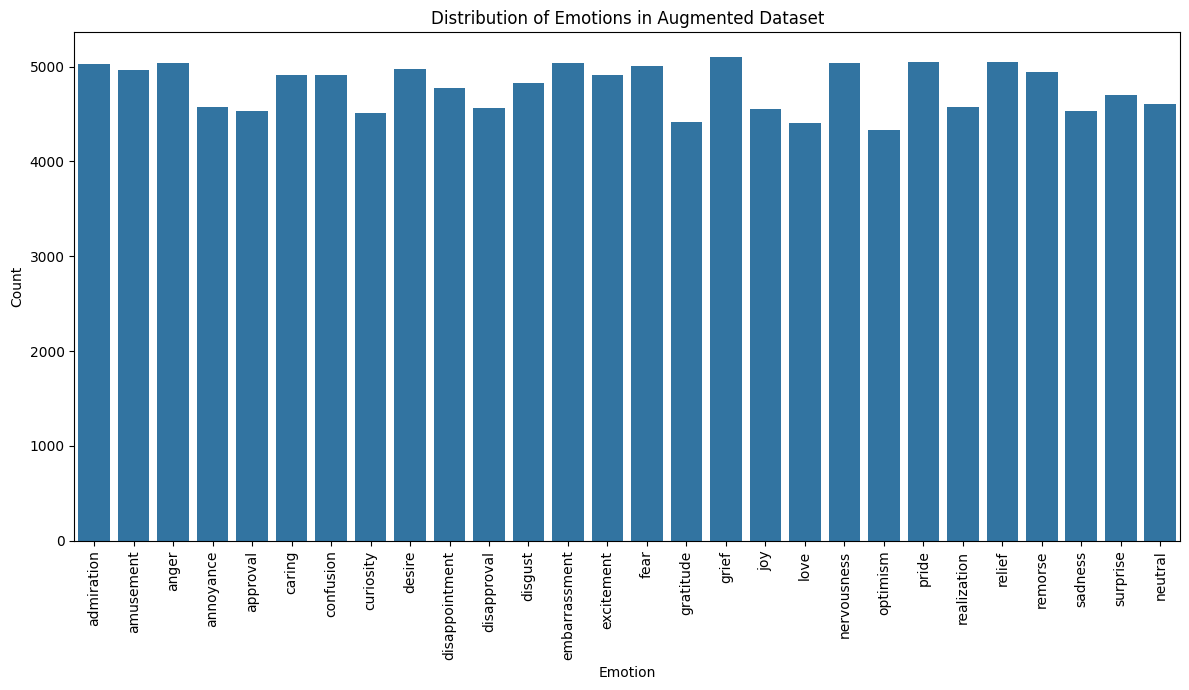

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map label IDs to emotion names (assuming emotion_map is defined)
emotion_map = {
    0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval",
    5: "caring", 6: "confusion", 7: "curiosity", 8: "desire", 9: "disappointment",
    10: "disapproval", 11: "disgust", 12: "embarrassment", 13: "excitement",
    14: "fear", 15: "gratitude", 16: "grief", 17: "joy", 18: "love",
    19: "nervousness", 20: "optimism", 21: "pride", 22: "realization", 23: "relief",
    24: "remorse", 25: "sadness", 26: "surprise", 27: "neutral"
}


# Calculate the value counts of the 'labels' column
label_counts = augmented_df_loaded_again['labels'].value_counts().sort_index()

# Map the numerical labels to their corresponding emotion names
emotion_counts_sorted = label_counts.rename(index=emotion_map)

# Plot the distribution
plt.figure(figsize=(12, 7))
sns.barplot(x=emotion_counts_sorted.index, y=emotion_counts_sorted.values)
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.title("Distribution of Emotions in Augmented Dataset")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the augmented dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    augmented_df_loaded_again['text'],
    augmented_df_loaded_again['labels'], # Use the corrected numerical labels
    test_size=0.2, # 80% train, 20% test split
    random_state=42, # for reproducibility
    stratify=augmented_df_loaded_again['labels'] # Stratify to maintain class distribution
)

print("Dataset split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Dataset split into training and testing sets.
Shape of X_train: (107093,)
Shape of X_test: (26774,)
Shape of y_train: (107093,)
Shape of y_test: (26774,)


In [ ]:
from transformers import RobertaTokenizerFast

# Load the Roberta tokenizer
tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")

print("Roberta tokenizer loaded.")

Roberta tokenizer loaded.


In [ ]:
# Tokenize the training and testing data
X_train_tokenized = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")
X_test_tokenized = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors="pt")

print("Training and testing data tokenized.")
print(f"Shape of X_train_tokenized['input_ids']: {X_train_tokenized['input_ids'].shape}")
print(f"Shape of X_test_tokenized['input_ids']: {X_test_tokenized['input_ids'].shape}")
print(f"Shape of X_train_tokenized['attention_mask']: {X_train_tokenized['attention_mask'].shape}")
print(f"Shape of X_test_tokenized['attention_mask']: {X_test_tokenized['attention_mask'].shape}")

Training and testing data tokenized.
Shape of X_train_tokenized['input_ids']: torch.Size([107093, 128])
Shape of X_test_tokenized['input_ids']: torch.Size([26774, 95])
Shape of X_train_tokenized['attention_mask']: torch.Size([107093, 128])
Shape of X_test_tokenized['attention_mask']: torch.Size([26774, 95])


In [ ]:
import torch

# Convert the numerical labels to PyTorch tensors
y_train_tensor = torch.tensor(y_train.tolist(), dtype=torch.long)
y_test_tensor = torch.tensor(y_test.tolist(), dtype=torch.long)

print("Numerical labels converted to PyTorch tensors.")
print(f"Shape of y_train_tensor: {y_train_tensor.shape}")
print(f"Shape of y_test_tensor: {y_test_tensor.shape}")

Numerical labels converted to PyTorch tensors.
Shape of y_train_tensor: torch.Size([107093])
Shape of y_test_tensor: torch.Size([26774])


In [ ]:
from transformers import RobertaForSequenceClassification

# Determine the number of unique labels
num_labels = augmented_df_loaded_again['labels'].nunique()
print(f"Number of unique labels: {num_labels}")


# Load the Roberta model for sequence classification
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_labels)

print("Roberta model for sequence classification loaded.")

Number of unique labels: 28


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Roberta model for sequence classification loaded.


In [ ]:
from transformers import TrainingArguments

# Define training arguments
training_args = TrainingArguments(
    output_dir="C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/goemotion/roberta", # Output directory for model checkpoints
    eval_strategy="epoch", # Evaluate every epoch # Corrected parameter name
    save_strategy="epoch", # Save checkpoint every epoch
    learning_rate=1.958376060959242e-05, # Initial learning rate (will be overridden by HP search)
    per_device_train_batch_size=8, # Batch size for training
    per_device_eval_batch_size=8, # Batch size for evaluation
    num_train_epochs=5, # Number of training epochs (will be overridden by HP search)
    weight_decay=0.01, # Weight decay
    logging_dir="./logs", # Directory for logs
    logging_steps=100, # Log every 100 steps
    report_to="none", # Disable reporting to external services
    load_best_model_at_end=True, # Load the best model at the end of training
    metric_for_best_model="eval_loss", # Metric to determine the best model
)

print("Training arguments defined.")

Training arguments defined.


In [ ]:
import optuna

# Define the hyperparameter search space
def optuna_hp_space(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True),
        "num_train_epochs": trial.suggest_int("num_train_epochs", 1, 5),
        # You can add other hyperparameters to search here, e.g.,
        # "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [8, 16, 32]),
        # "weight_decay": trial.suggest_float("weight_decay", 0.0, 0.1),
    }

print("Hyperparameter search space defined.")

Hyperparameter search space defined.


In [ ]:
import torch

# Define the model initialization function for hyperparameter search
def model_init(trial):
    # Load the Roberta model for sequence classification
    # Ensure the model is moved to the appropriate device (GPU if available)
    return RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=num_labels).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))

print("Model initialization function defined.")

Model initialization function defined.


In [ ]:
from transformers import Trainer
from torch.utils.data import Dataset
import torch

# Create a custom Dataset that returns dictionaries
class RobertaEmotionDataset(Dataset):
    def __init__(self, input_ids, attention_mask, labels):
        self.input_ids = input_ids
        self.attention_mask = attention_mask
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_mask[idx],
            'labels': self.labels[idx]
        }

# Create instances of the custom dataset
train_dataset = RobertaEmotionDataset(
    X_train_tokenized['input_ids'],
    X_train_tokenized['attention_mask'],
    y_train_tensor
)

test_dataset = RobertaEmotionDataset(
    X_test_tokenized['input_ids'],
    X_test_tokenized['attention_mask'],
    y_test_tensor
)

# Define a simple custom data collator to handle padding
class CustomDataCollator:
    def __init__(self, tokenizer):
        self.tokenizer = tokenizer

    def __call__(self, features):
        # features is a list of dictionaries, one for each sample in the batch
        input_ids = [f['input_ids'] for f in features]
        attention_mask = [f['attention_mask'] for f in features]
        labels = [f['labels'] for f in features]

        # Pad the input_ids and attention_mask
        padded_input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id)
        padded_attention_mask = torch.nn.utils.rnn.pad_sequence(attention_mask, batch_first=True, padding_value=0)

        # Stack the labels
        labels_tensor = torch.stack(labels)

        return {
            'input_ids': padded_input_ids,
            'attention_mask': padded_attention_mask,
            'labels': labels_tensor
        }

# Instantiate the custom data collator
data_collator = CustomDataCollator(tokenizer=tokenizer)


# Instantiate the Trainer
trainer = Trainer(
    model_init=model_init, # Use the model initialization function for HP search
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    data_collator=data_collator, # Provide the custom data collator
)

print("Trainer instantiated.")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Trainer instantiated.


In [ ]:
# Run hyperparameter search
best_trial = trainer.hyperparameter_search(
    direction="minimize", # We want to minimize the evaluation loss
    backend="optuna",
    hp_space=optuna_hp_space,
    n_trials=1, # Run only 1 trial as requested
)

print("Best hyperparameters found:")
print(best_trial)

[I 2025-09-29 22:26:57,573] A new study created in memory with name: no-name-24da6f7b-410e-47dc-841b-9379e95f57bf
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,2.593700,2.527425
2,2.459400,2.490819


[I 2025-09-29 23:28:21,656] Trial 0 finished with value: 2.490818500518799 and parameters: {'learning_rate': 1.958376060959242e-05, 'num_train_epochs': 2}. Best is trial 0 with value: 2.490818500518799.


Best hyperparameters found:
BestRun(run_id='0', objective=2.490818500518799, hyperparameters={'learning_rate': 1.958376060959242e-05, 'num_train_epochs': 2}, run_summary=None)


In [ ]:
trainer.train()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss



KeyboardInterrupt



In [ ]:
save_path_clf = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/goemotion/roberta"
trainer.save_model(save_path_clf)

In [ ]:
from transformers import RobertaForSequenceClassification
from sklearn.metrics import classification_report
import torch

# Define the path where the model was saved
save_path_clf = "C:/Users/adria/OneDrive/Desktop/CODING/jupyter/models/goemotion/roberta"

# Load the trained model
loaded_model = RobertaForSequenceClassification.from_pretrained(save_path_clf)

# Move the model to the appropriate device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loaded_model.to(device)

# Set the model to evaluation mode
loaded_model.eval()

# Generate predictions
predictions = trainer.predict(test_dataset)

# Get the predicted labels
predicted_labels = predictions.predictions.argmax(axis=1)

# Get the true labels
true_labels = predictions.label_ids

# Create a dictionary to map label IDs to emotion names
emotion_map = {
    0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval",
    5: "caring", 6: "confusion", 7: "curiosity", 8: "desire", 9: "disappointment",
    10: "disapproval", 11: "disgust", 12: "embarrassment", 13: "excitement",
    14: "fear", 15: "gratitude", 16: "grief", 17: "joy", 18: "love",
    19: "nervousness", 20: "optimism", 21: "pride", 22: "realization", 23: "relief",
    24: "remorse", 25: "sadness", 26: "surprise", 27: "neutral"
}

# Create a mapping from emotion name back to label ID
emotion_to_id = {emotion: i for i, emotion in emotion_map.items()}


# Generate the classification report
# Create a mapping from label ID back to emotion name for better readability in the report
id_to_emotion = {i: emotion for emotion, i in emotion_to_id.items()}
target_names = [id_to_emotion[i] for i in sorted(id_to_emotion.keys())]


report = classification_report(true_labels, predicted_labels, target_names=target_names, zero_division=0)

print("Classification Report:")
print(report)

Classification Report:
                precision    recall  f1-score   support

    admiration       0.70      0.81      0.75      1007
     amusement       0.76      0.49      0.60       992
         anger       0.39      0.25      0.31      1008
     annoyance       0.35      0.17      0.23       915
      approval       0.50      0.30      0.37       905
        caring       0.24      0.13      0.17       982
     confusion       0.24      0.20      0.22       983
     curiosity       0.43      0.37      0.40       902
        desire       0.24      0.12      0.16       996
disappointment       0.22      0.14      0.17       954
   disapproval       0.44      0.31      0.36       914
       disgust       0.15      0.16      0.15       966
 embarrassment       0.18      0.23      0.20      1008
    excitement       0.15      0.36      0.21       982
          fear       0.18      0.23      0.20      1001
     gratitude       0.81      0.50      0.62       884
         grief       0.2